## TensorFlow: Simple Neural Network for Classification

This example uses TensorFlow with its Keras API to create a simple neural network for binary classification. Classification means assigning input data to one of several categories. Binary classification means there are only two categories (e.g., yes/no, spam/not-spam).

We'll use synthetic (artificially generated) data for this task.

### Prerequisite: Check GPU Availability Using TensorFlow

#### Output should look like (complaints can be ignored and only show on 1st run):
```bash
2025-05-11 20:50:25.015083: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-11 20:50:25.020710: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
E0000 00:00:1747011025.027882   13580 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747011025.030095   13580 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-11 20:50:25.037501: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
TensorFlow version: 2.18.0
TensorFlow is using 2 GPU(s).
TensorFlow built with CUDA version: 12.6
TensorFlow built with cuDNN version: 9
```
#### Output explanation:
1. The run logs show that TensorFlow is now imported successfully and is running using 2 GPUs. The lines about registering cuFFT, cuDNN, and cuBLAS are warnings that arise when TensorFlow detects that these libraries have already been registered. They are expected in multi‐GPU environments and do not indicate a critical error.
2. If you prefer to suppress these verbose logs, you can set the environment variable TF_CPP_MIN_LOG_LEVEL to 2 before importing TensorFlow.

    ```python
    import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress INFO and WARNING messages from TensorFlow
    ```

In [1]:
try:
    import tensorflow as tf
except ModuleNotFoundError:
    print("Error: tensorflow module not found. Please install it via 'pip install tensorflow'")
    raise

print(f"TensorFlow version: {tf.__version__}")
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print(f"TensorFlow is using {len(gpu_devices)} GPU(s).")
    # To get more details about the CUDA version TF was built with:
    build_info = tf.sysconfig.get_build_info()
    print(f"TensorFlow built with CUDA version: {build_info.get('cuda_version', 'N/A')}")
    print(f"TensorFlow built with cuDNN version: {build_info.get('cudnn_version', 'N/A')}")
else:
    print("TensorFlow: No GPU devices found.")

2025-05-24 00:41:27.103796: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-24 00:41:27.156228: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748061687.165773   47905 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748061687.169390   47905 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-24 00:41:27.223672: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

TensorFlow version: 2.18.0
TensorFlow is using 2 GPU(s).
TensorFlow built with CUDA version: 12.6
TensorFlow built with cuDNN version: 9


### 1 Importing Libraries

-   `tensorflow` as `tf`: The main TensorFlow library.
-   `numpy`: For numerical operations, though TensorFlow has its own tensor operations too.
-   `sklearn.datasets.make_classification`: A utility from Scikit-learn to generate a random n-class classification problem. This is great for quickly creating data to test models.
-   `sklearn.model_selection.train_test_split`: A utility to split data into training and testing sets. We train the model on the training set and then evaluate its performance on the unseen testing set.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt  # Missing import for plotting
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # For feature scaling

### 2 Generating Synthetic Classification Data

-   `make_classification(...)`: Generates the data.
    -   `n_samples=1000`: We want 1000 data points (samples).
    -   `n_features=4`: Each sample will have 4 input features.
    -   `n_classes=2`: There are 2 output classes (binary classification).
    -   `random_state=42`: Ensures that we get the same random data every time we run the code, making results reproducible. `42` is just a commonly used number.
-   `X` will contain the features (our input data), and `y` will contain the corresponding class labels (0 or 1).
-   `train_test_split(X, y, test_size=0.2, random_state=42)`: Splits the data. 
    -   `test_size=0.2`: Reserves 20% of the data for the test set, and the remaining 80% for the training set.

**Feature Scaling**:
It's often good practice to scale input features, especially for neural networks. This helps the optimizer work more effectively. We'll use `StandardScaler` from Scikit-learn, which standardizes features by removing the mean and scaling to unit variance.

In [3]:
# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit on training data and transform it
X_test = scaler.transform(X_test)     # Transform test data using the same scaler

print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}")
print(f"First 5 samples of X_train (scaled):\n{X_train[:5]}")
print(f"First 5 labels of y_train:\n{y_train[:5]}")

Shape of X_train: (800, 4), Shape of y_train: (800,)
Shape of X_test: (200, 4), Shape of y_test: (200,)
First 5 samples of X_train (scaled):
[[ 0.32129268  0.586202   -0.10387867  0.64127933]
 [ 2.22462754 -0.33109131 -0.23558958 -1.94440732]
 [-1.10234414  1.03056246  2.0148836  -0.82084143]
 [ 0.65795258 -0.80020736 -0.08606385  0.62780237]
 [ 0.08785083  0.16532588 -1.17995002  0.89207167]]
First 5 labels of y_train:
[1 1 0 1 1]


### 2.1 Inspecting Data Split and Scaling Output

When you run the previous cell, you should see:
- **Shapes of datasets**  
  - `X_train`: 800 samples × 4 features  
  - `y_train`: 800 labels  
  - `X_test`: 200 samples × 4 features  
  - `y_test`: 200 labels  
- **First 5 scaled feature rows** showing standardized values (mean ≈ 0, variance ≈ 1), confirming that `StandardScaler` worked correctly.  
- **First 5 labels** in `y_train`, verifying the binary targets (0 or 1) that the model will learn from.

### 3 Defining the Neural Network Model

We use Keras's `Sequential` API, which is a straightforward way to build models by stacking layers one after the other.

-   `tf.keras.Sequential([...])`: Creates a sequential model.
-   `tf.keras.layers.Dense(16, activation='relu', input_shape=(4,))`: The first hidden layer.
    -   `Dense`: A fully connected layer, meaning each neuron in this layer is connected to every neuron in the previous layer (or input).
    -   `16`: The number of neurons (or units) in this layer.
    -   `activation='relu'`: The activation function. 'ReLU' (Rectified Linear Unit) is a common choice for hidden layers. It outputs the input directly if it's positive, otherwise, it outputs zero.
    -   `input_shape=(4,)`: Specifies the shape of the input for the first layer only. Our data has 4 features.
-   `tf.keras.layers.Dense(8, activation='relu')`: The second hidden layer with 8 neurons and ReLU activation.
-   `tf.keras.layers.Dense(1, activation='sigmoid')`: The output layer.
    -   `1`: One neuron because this is binary classification (it will output a single value between 0 and 1).
    -   `activation='sigmoid'`: The sigmoid activation function squashes the output to a range between 0 and 1. This can be interpreted as the probability of belonging to class 1. For multi-class classification, you'd typically use `softmax`.

In [4]:
# Define a simple neural network
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)), # Input shape from X_train
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Display the model's architecture
model_tf.summary()

/home/max/miniconda3/envs/classification_models_py3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748061711.110806   47905 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 19850 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1748061711.113123   47905 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22239 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:02:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

### 4 Compiling the Model

Before training, we need to configure the learning process using the `compile` method.

-   `optimizer='adam'`: Specifies the optimizer. 'Adam' is another popular and effective optimization algorithm.
-   `loss='binary_crossentropy'`: Specifies the loss function. `binary_crossentropy` is suitable for binary classification problems where the output is a probability (due to the sigmoid activation in the last layer).
-   `metrics=['accuracy']`: Specifies metrics to monitor during training and evaluation. Here, we want to see the 'accuracy' (the proportion of correctly classified samples).

In [5]:
# Compile the model
model_tf.compile(optimizer='adam', 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

### 5 Training the Model

Now we train the model using the `fit` method.

-   `X_train, y_train`: The training data (features and labels).
-   `epochs=10`: The number of times the model will see the entire training dataset.
-   `batch_size=32`: The number of samples processed before the model's parameters are updated. The training data is divided into batches.
-   `validation_split=0.2`: Reserves 20% of the *training data* to be used as validation data. The model's performance on this validation data is monitored during training, which can help detect overfitting (when the model performs well on training data but poorly on unseen data).
-   `verbose=1`: How much information to display during training (1 usually means a progress bar and metrics per epoch).

In [6]:
# Train the model
print("\nTraining the TensorFlow model...")
history = model_tf.fit(X_train, y_train, 
                         epochs=10, 
                         batch_size=32, 
                         validation_split=0.2, # Use part of training data for validation
                         verbose=1)


Training the TensorFlow model...
Epoch 1/10


I0000 00:00:1748061751.849868   51614 service.cc:148] XLA service 0x7f51940067e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748061751.849883   51614 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1748061751.849885   51614 service.cc:156]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-05-24 00:42:31.879253: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748061751.958358   51614 cuda_dnn.cc:529] Loaded cuDNN version 90800


 1/20 ━━━━━━━━━━━━━━━━━━━━ 15s 799ms/step - accuracy: 0.4062 - loss: 0.7695

I0000 00:00:1748061752.265788   51614 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5182 - loss: 0.7353 - val_accuracy: 0.6313 - val_loss: 0.6789
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6529 - loss: 0.6858 - val_accuracy: 0.6750 - val_loss: 0.6452
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7636 - loss: 0.6409 - val_accuracy: 0.7875 - val_loss: 0.6155
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7935 - loss: 0.6131 - val_accuracy: 0.8750 - val_loss: 0.5858
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8449 - loss: 0.5705 - val_accuracy: 0.9187 - val_loss: 0.5534
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8670 - loss: 0.5406 - val_accuracy: 0.9062 - val_loss: 0.5205
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8986 - loss: 0.4899 - val_accuracy: 0.8938 - val_loss: 0.4843
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9051 - loss: 0.4512 - val_accuracy: 0.9000 - val_loss: 0.4463
Ep

### 6 Evaluating the Model

After training, we evaluate the model's performance on the test set (`X_test`, `y_test`), which it has never seen before.

-   `model.evaluate(X_test, y_test, verbose=0)`: Calculates the loss and any specified metrics (like accuracy) on the test data. `verbose=0` means it won't print progress during evaluation.


Test Loss: 0.3760
Test Accuracy: 0.8650


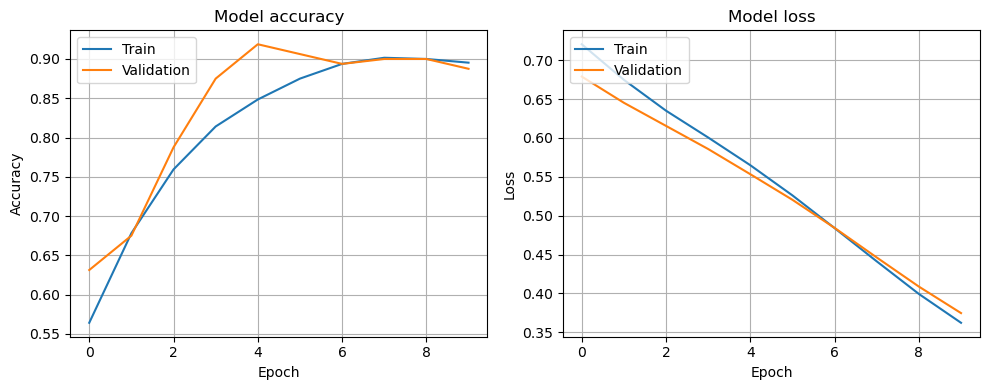

In [7]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_tf.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy values
if 'accuracy' in history.history and 'val_accuracy' in history.history:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Accuracy/loss history not fully available for plotting.")

### 7 TensorFlow Practice Variation: Add Dropout Layers

**Dropout** is a regularization technique used to prevent overfitting in neural networks. Overfitting happens when a model learns the training data too well, including its noise, and performs poorly on new, unseen data.

During training, a dropout layer randomly sets a fraction of input units to 0 at each update. This helps to make the network more robust and prevents neurons from co-adapting too much.

-   `tf.keras.layers.Dropout(0.2)`: Adds a dropout layer. `0.2` means that 20% of the input units will be randomly set to 0 during each update in the training phase. Dropout is only active during training, not during evaluation or inference.

Let's modify our model to include dropout layers after each Dense hidden layer.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)


Training the TensorFlow model with Dropout...
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5551 - loss: 0.6876 - val_accuracy: 0.5375 - val_loss: 0.6796
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5652 - loss: 0.6681 - val_accuracy: 0.5625 - val_loss: 0.6571
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5927 - loss: 0.6524 - val_accuracy: 0.6250 - val_loss: 0.6374
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6281 - loss: 0.6327 - val_accuracy: 0.6687 - val_loss: 0.6166
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6685 - loss: 0.5980 - val_accuracy: 0.7437 - val_loss: 0.5932
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6893 - loss: 0.5961 - val_accuracy: 0.8188 - val_loss: 0.5635
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7838 - loss: 0.5532 - val_accuracy: 0.8375 - val_loss: 0.5301
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8062 -

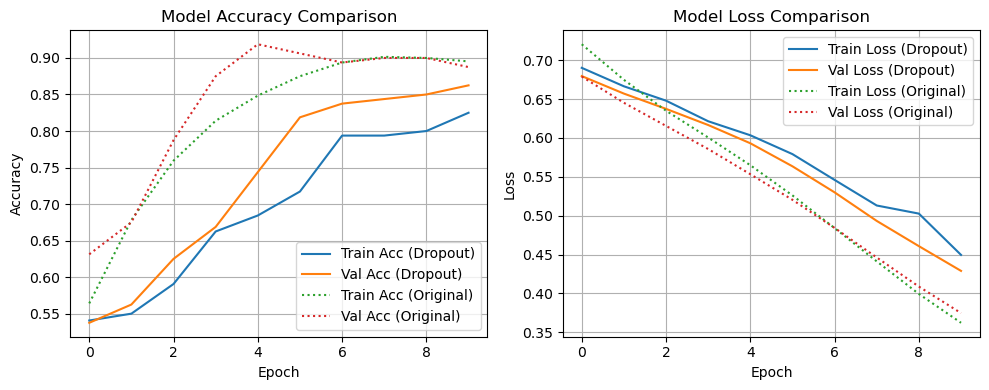

In [8]:
# Define a neural network with Dropout layers
model_tf_variation = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Dropout layer after the first Dense layer (30% dropout rate)
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer after the second Dense layer (20% dropout rate)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Display the new model's architecture
model_tf_variation.summary()

# Compile the variation model
model_tf_variation.compile(optimizer='adam', 
                           loss='binary_crossentropy', 
                           metrics=['accuracy'])

# Train the variation model
print("\nTraining the TensorFlow model with Dropout...")
history_variation = model_tf_variation.fit(X_train, y_train, 
                                           epochs=10, # Using fewer epochs to see effect quickly, can increase
                                           batch_size=32, 
                                           validation_split=0.2, 
                                           verbose=1)

# Evaluate the variation model
test_loss_var, test_accuracy_var = model_tf_variation.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss (Variation with Dropout): {test_loss_var:.4f}")
print(f"Test Accuracy (Variation with Dropout): {test_accuracy_var:.4f}")

# Plot training & validation accuracy and loss for the variation model
if 'accuracy' in history_variation.history and 'val_accuracy' in history_variation.history:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history_variation.history['accuracy'], label='Train Acc (Dropout)')
    plt.plot(history_variation.history['val_accuracy'], label='Val Acc (Dropout)')
    if 'accuracy' in history.history: # Original model's history
        plt.plot(history.history['accuracy'], label='Train Acc (Original)', linestyle=':')
        plt.plot(history.history['val_accuracy'], label='Val Acc (Original)', linestyle=':')
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history_variation.history['loss'], label='Train Loss (Dropout)')
    plt.plot(history_variation.history['val_loss'], label='Val Loss (Dropout)')
    if 'loss' in history.history: # Original model's history
        plt.plot(history.history['loss'], label='Train Loss (Original)', linestyle=':')
        plt.plot(history.history['val_loss'], label='Val Loss (Original)', linestyle=':')
    plt.title('Model Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Accuracy/loss history for variation model not fully available for plotting.")

With dropout, you might see that the training accuracy is a bit lower or increases slower, but the validation accuracy might be better or the gap between training and validation accuracy might be smaller, indicating less overfitting. The effect of dropout is usually more pronounced on more complex models and datasets where overfitting is a bigger risk.